In [127]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import warnings

from scipy.stats import f_oneway
warnings.filterwarnings('ignore')  #to ignore warnings

<h3 style=background-color:pink>Importing datasets using pandas</h3>

In [128]:
accidents = pd.read_csv('datasets\\accident_data.csv')

<h3 style=background-color:pink>Showing DataFrame</h3>

In [129]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

<h4 style=background-color:pink><i><--describe is for showing a table--></i></h4>

In [130]:
accidents.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


<h3 style=background-color:pink>Showing Null values</h3>

In [131]:
accidents.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

<h4 style=background-color:pink><i><--setting a value for null--></i></h4>

In [132]:
accidents['Latitude'] = accidents['Latitude'].fillna(accidents['Latitude'].mode()[0])
accidents['Longitude'] = accidents['Longitude'].fillna(accidents['Longitude'].mode()[0])
accidents['Road_Surface_Conditions'] = accidents['Road_Surface_Conditions'].fillna(accidents['Road_Surface_Conditions'].mode()[0])
accidents['Road_Type'] = accidents['Road_Type'].fillna('unknown')
accidents['Urban_or_Rural_Area'] = accidents['Urban_or_Rural_Area'].fillna(accidents['Urban_or_Rural_Area'].mode()[0])
accidents['Weather_Conditions'] = accidents['Weather_Conditions'].fillna('unnacounted')

accidents.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h3 style=background-color:pink>Showing DataTypes</h3>

In [133]:
accidents.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

<h4 style=background-color:pink><i><--changing each DataTypes--></i></h4>

In [134]:
accidents['Accident_Severity'] = accidents['Accident_Severity'].astype('category')
accidents['Light_Conditions'] = accidents['Light_Conditions'].astype('category')
accidents['District Area'] = accidents['District Area'].astype('category')
accidents['Road_Surface_Conditions'] = accidents['Road_Surface_Conditions'].astype('category')
accidents['Road_Type'] = accidents['Road_Type'].astype('category')
accidents['Urban_or_Rural_Area'] = accidents['Urban_or_Rural_Area'].astype('category')
accidents['Weather_Conditions'] = accidents['Weather_Conditions'].astype('category')
accidents['Vehicle_Type'] = accidents['Vehicle_Type'].astype('category')

#setting a DataTypes for date to a datetime
accidents['Accident Date'] = pd.to_datetime(accidents['Accident Date'], dayfirst = True, errors = 'coerce')


accidents.dtypes


Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

<h3 style=background-color:pink>Setting a</h3>

In [135]:
accidents['Year'] = accidents['Accident Date'].dt.year
accidents['Month'] = accidents['Accident Date'].dt.month
accidents['Day'] = accidents['Accident Date'].dt.day
accidents['DayOfWeek'] = accidents['Accident Date'].dt.dayofweek

accidents.isnull().sum()

Index                           0
Accident_Severity               0
Accident Date              395672
Latitude                        0
Light_Conditions                0
District Area                   0
Longitude                       0
Number_of_Casualties            0
Number_of_Vehicles              0
Road_Surface_Conditions         0
Road_Type                       0
Urban_or_Rural_Area             0
Weather_Conditions              0
Vehicle_Type                    0
Year                       395672
Month                      395672
Day                        395672
DayOfWeek                  395672
dtype: int64

In [136]:
y2019 = accidents[accidents['Year'] == 2019] #accessing all 2019 data recorded

<h1 style=background-color:lightblue>[#1] Is it possible that next year, most accidents record can be fatal?</h1>

In [137]:
y2019['Index'].count()

np.int64(71867)

In [138]:
y2019['Accident_Severity'].value_counts()

Accident_Severity
Slight     60928
Serious     9823
Fatal       1116
Name: count, dtype: int64

In [139]:
y_2019 = y2019[y2019['Accident_Severity'] == 'Fatal'].count() / y2019['Accident_Severity'].count()

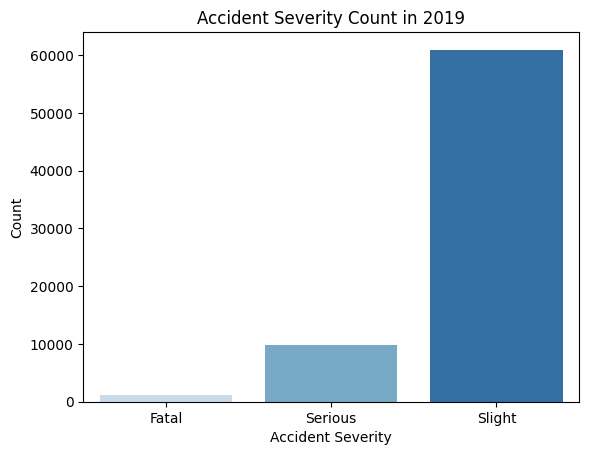

In [140]:
s_counts = y2019['Accident_Severity'].value_counts()

sns.barplot(x=s_counts.index, y=s_counts.values, palette='Blues')

plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.title('Accident Severity Count in 2019')

plt.show()

<h1 style=background-color:lightgreen>[Insight #1] since the percentage of 2019 accidents record is very low. It is impossible that next year most recorded accidents can be fatal</h1>

<h1 style=background-color:lightblue>[#2] Did the Fine weather influence the accident that happened in 2019?</h1>

In [141]:
y2019[y2019['Weather_Conditions'] == 'Fine no high winds'].count()

Index                      58345
Accident_Severity          58345
Accident Date              58345
Latitude                   58345
Light_Conditions           58345
District Area              58345
Longitude                  58345
Number_of_Casualties       58345
Number_of_Vehicles         58345
Road_Surface_Conditions    58345
Road_Type                  58345
Urban_or_Rural_Area        58345
Weather_Conditions         58345
Vehicle_Type               58345
Year                       58345
Month                      58345
Day                        58345
DayOfWeek                  58345
dtype: int64

In [142]:
y_2019 = y2019[y2019['Weather_Conditions'] == 'Fine no high winds'].count() / y2019['Accident_Severity'].count()
y_2019 * 100

Index                      81.184688
Accident_Severity          81.184688
Accident Date              81.184688
Latitude                   81.184688
Light_Conditions           81.184688
District Area              81.184688
Longitude                  81.184688
Number_of_Casualties       81.184688
Number_of_Vehicles         81.184688
Road_Surface_Conditions    81.184688
Road_Type                  81.184688
Urban_or_Rural_Area        81.184688
Weather_Conditions         81.184688
Vehicle_Type               81.184688
Year                       81.184688
Month                      81.184688
Day                        81.184688
DayOfWeek                  81.184688
dtype: float64

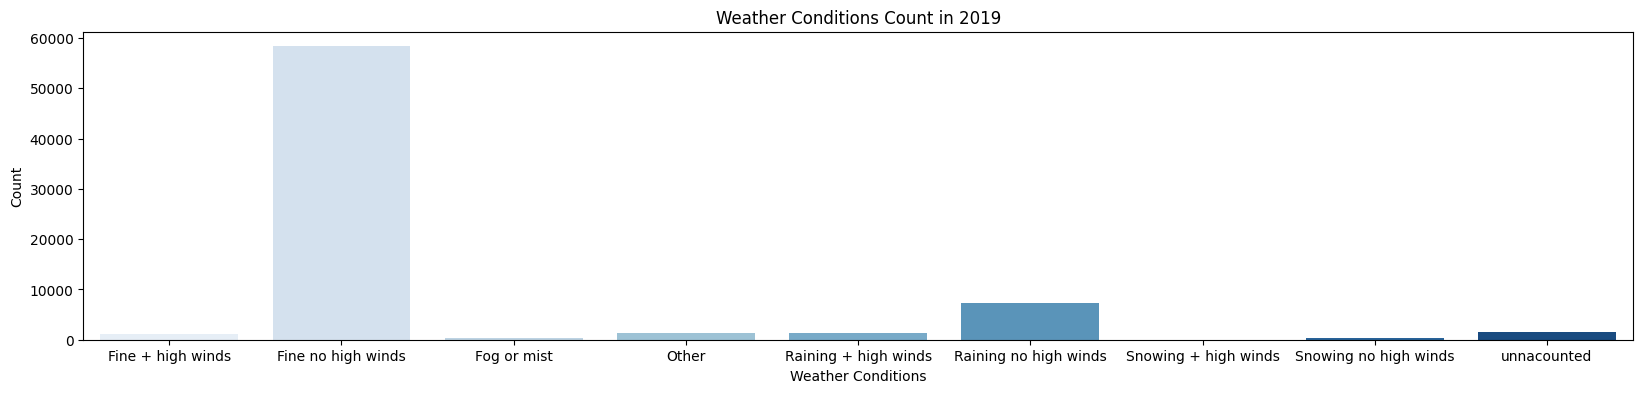

In [143]:
w_cond = y2019['Weather_Conditions'].value_counts()

plt.figure(figsize=(20, 4))
sns.barplot(x=w_cond.index, y=w_cond.values, palette='Blues')

plt.xlabel('Weather Conditions')
plt.ylabel('Count')
plt.title('Weather Conditions Count in 2019')

plt.show()

<h1 style=background-color:lightgreen>[Insight #2] Yes. Fine weather actually has a big influenced in an accident happened in wayback 2019. It means that the most accident happened during a nice weather</h1>

<h1 style=background-color:lightblue>[#3] Is there a possibility that being in a dark place, can caused a slight accident?  </h1>

In [144]:
accidents['Accident_Severity'].count()

np.int64(660679)

In [145]:
accidents['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

<h3 style=background-color:pink>Darkness</h3>

In [146]:
Darkness = ['Darkness - lights lit', 'Darkness - no lighting', 'Darkness - lighting unknown', 'Darkness - lights unlit']

In [147]:
dark_accident = accidents[accidents['Light_Conditions'].isin(Darkness)].count() / accidents['Accident_Severity'].count()
dark_accident['Accident_Severity'] * 100

np.float64(26.60883727195809)

<h3 style=background-color:pink>Daylight</h3>

In [148]:
day_accident = accidents[accidents['Light_Conditions'] == 'Daylight'].count() / accidents['Accident_Severity'].count()
day_accident['Accident_Severity'] * 100

np.float64(73.3911627280419)

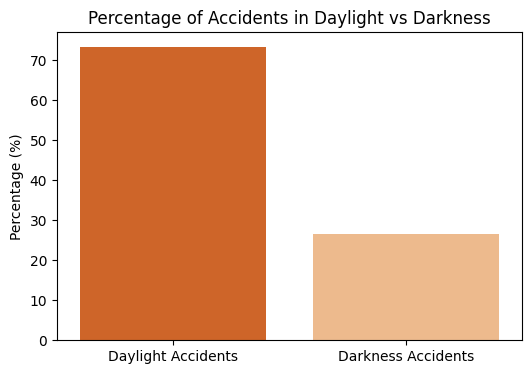

In [149]:

Darkness = ['Darkness - lights lit', 'Darkness - no lighting', 'Darkness - lighting unknown', 'Darkness - lights unlit']

total_accidents = len(accidents)
dark_accidents = len(accidents[accidents['Light_Conditions'].isin(Darkness)])
day_accidents = len(accidents[accidents['Light_Conditions'] == 'Daylight'])


dark_percentage = (dark_accidents / total_accidents) * 100
day_percentage = (day_accidents / total_accidents) * 100


plt.figure(figsize=(6, 4))
sns.barplot(x=['Daylight Accidents', 'Darkness Accidents'], y=[day_percentage, dark_percentage], palette='Oranges_r')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Accidents in Daylight vs Darkness')


plt.show()

<h1 style=background-color:lightgreen>[Insight #3] There is a chance that accident can happen, but not as high as the chance with the daylight </h1>

<h1 style=background-color:lightblue>[#4] What year and weather has the most accident recorded with fatal injury  </h1>

In [150]:
acdnt_year = np.round(accidents[accidents["Accident_Severity"] == 'Fatal'].groupby(['Year', 'Weather_Conditions']).size())
acdnt_year.unstack()

Weather_Conditions,Fine + high winds,Fine no high winds,Fog or mist,Other,Raining + high winds,Raining no high winds,Snowing + high winds,Snowing no high winds,unnacounted
Year,,,,,,,,,
2019.0,31,942,14,11,17,92,0,1,8
2020.0,32,740,11,18,20,104,1,2,14
2021.0,14,651,8,19,15,97,0,7,12
2022.0,6,522,5,18,6,38,0,13,15


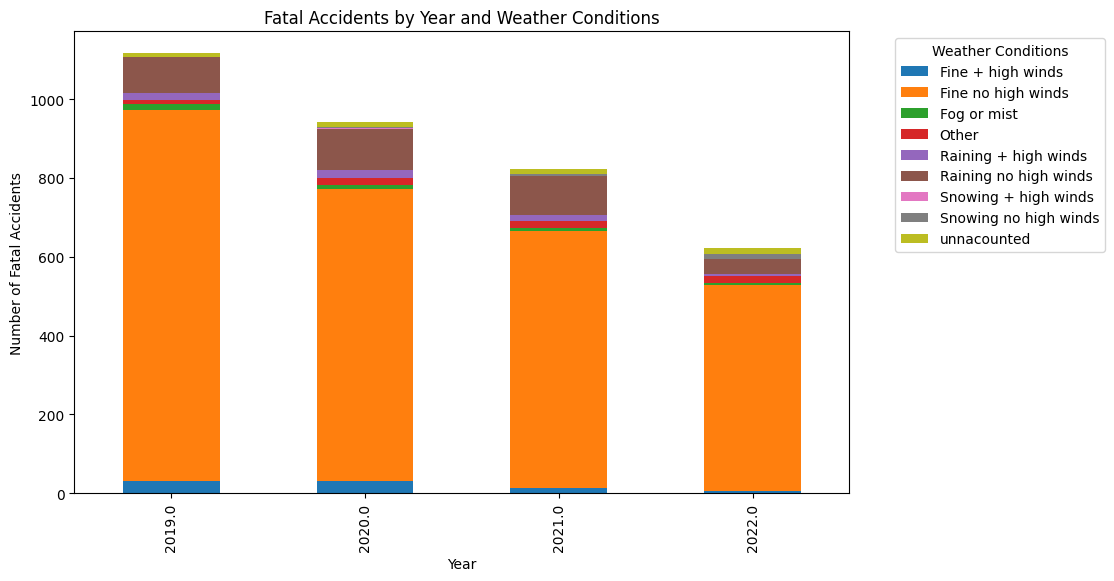

In [151]:

acdnt_year = accidents[accidents["Accident_Severity"] == "Fatal"].groupby(["Year", "Weather_Conditions"]).size()

acdnt_year_df = acdnt_year.unstack()

acdnt_year_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.ylabel('Number of Fatal Accidents')
plt.xlabel('Year')
plt.title('Fatal Accidents by Year and Weather Conditions')
plt.legend(title='Weather Conditions', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.show()


<h1 style=background-color:lightgreen>[Insight #4] 2019 has the highest record of accident happened with fatal injury while the weather is normal/calm; total of 942 record </h1>

<h1 style=background-color:lightgreen>[Insight #4.1] While the lowest accident recorded with fatal injury shows in year 2019 and 2020 in Snowing </h1>

<h1 style=background-color:lightblue>[#5] Which of the Month and Year has the most record of accident with fatal injury </h1>



In [152]:
m_2019 = np.round(accidents.groupby(['Year' , 'Month', 'Accident_Severity']).size())
m_2019.unstack()

Accident_Severity  Fatal  Serious  Slight
Year   Month                             
2019.0 1.0            81      699    4538
       2.0            83      750    5340
       3.0           102      775    5026
       4.0            91      811    4276
       5.0            96      803    5366
       6.0            73      865    4902
       7.0            86      821    5173
       8.0           105      886    5004
       9.0           101      858    4990
       10.0           86      831    5312
       11.0           97      870    5274
       12.0          115      854    5727
2020.0 1.0            91      644    4411
       2.0            79      843    5100
       3.0            76      726    4777
       4.0            73      706    4678
       5.0            96      863    4878
       6.0            61      836    4873
       7.0            89      759    5367
       8.0            67      763    4564
       9.0            73      768    5028
       10.0           87      860    5328
       11.0           82      731    5059
       12.0           68      847    5812
2021.0 1.0            66      582    3897
       2.0            61      588    4389
       3.0            68      663    4469
       4.0            84      731    4128
       5.0            63      763    4439
       6.0            62      763    4803
       7.0            68      791    4796
       8.0            79      757    4373
       9.0            63      831    4755
       10.0           70      802    5127
       11.0           67      765    5520
       12.0           72      822    5795
2022.0 1.0            34      294    2915
       2.0            46      587    4398
       3.0            46      669    4427
       4.0            52      580    3577
       5.0            46      570    3740
       6.0            65      615    4278
       7.0            52      711    4226
       8.0            60      610    3838
       9.0            62      733    4296
       10.0           66      759    4634
       11.0           56      686    5033
       12.0           38      452    3554

<Figure size 1200x600 with 0 Axes>

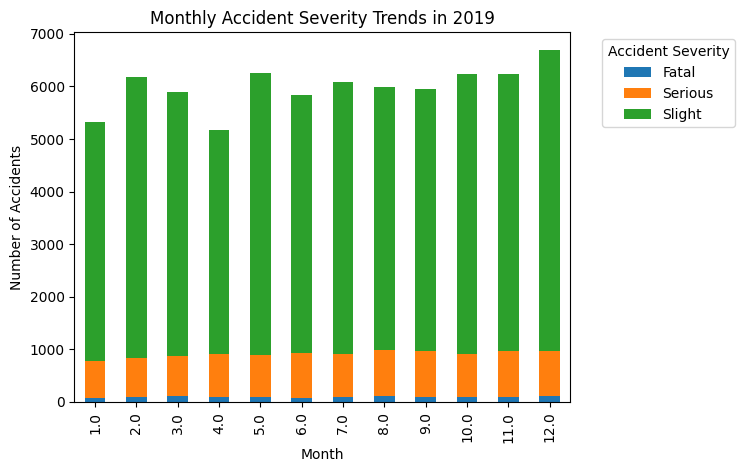

In [153]:

m_2019 = accidents.groupby(['Year', 'Month', 'Accident_Severity']).size().unstack()

plt.figure(figsize=(12, 6))
m_2019.loc[2019].plot(kind='bar', stacked=True)
plt.ylabel('Number of Accidents')
plt.xlabel('Month')
plt.title('Monthly Accident Severity Trends in 2019')
plt.legend(title='Accident Severity', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


<h1 style=background-color:lightgreen>[Insight #5] Most accident record happened in December 2019 with a total of 115 </h1>

<h1 style=background-color:lightblue>[#6] What kind of road type and places does the motorcycle most got involve in an accident based on the record?</h1>


In [154]:
accidents['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

In [155]:
motor_types = ['Motorcycle over 500cc', 'Motorcycle 125cc and under', 'Motorcycle over 125cc and up to 500cc', 'Motorcycle 50cc and under']

In [156]:
m_2019 = np.round(accidents[accidents['Vehicle_Type'].isin(motor_types)].groupby(['Road_Type', 'Urban_or_Rural_Area']).size())
m_2019.unstack()

Urban_or_Rural_Area,Rural,Unallocated,Urban
Road_Type,,,
Dual carriageway,3971,0,4482
One way street,86,0,1007
Roundabout,1247,0,2486
Single carriageway,13600,0,28359
Slip road,360,0,258
unknown,100,0,229


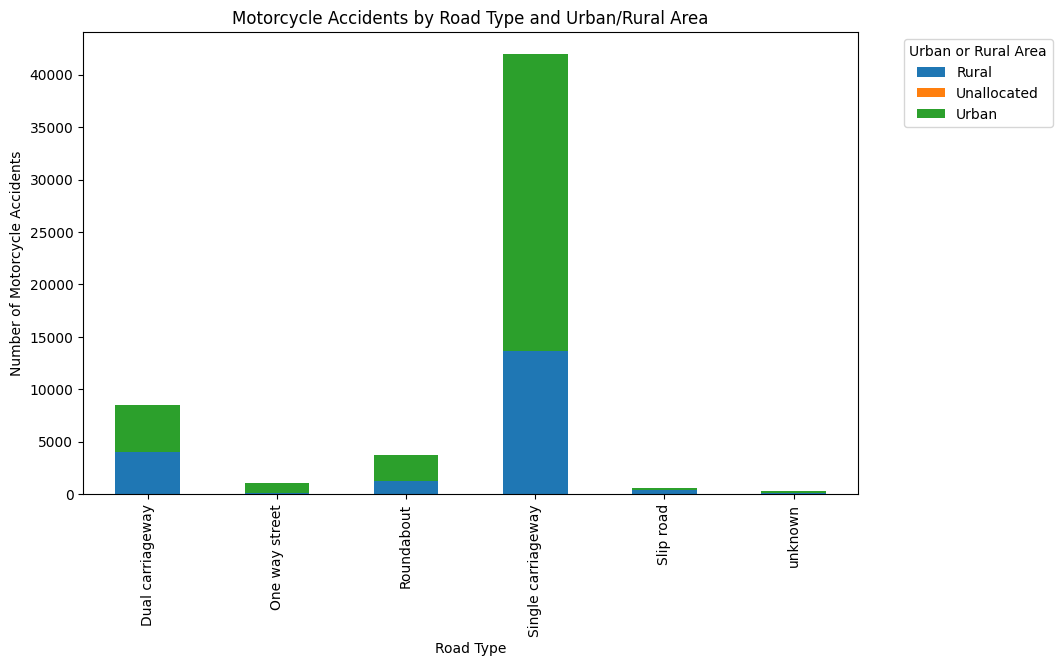

In [157]:
motor_types = ['Motorcycle over 500cc', 'Motorcycle 125cc and under', 'Motorcycle over 125cc and up to 500cc', 'Motorcycle 50cc and under']

m_2019 = accidents[accidents['Vehicle_Type'].isin(motor_types)].groupby(['Road_Type', 'Urban_or_Rural_Area']).size().unstack()

m_2019.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.ylabel('Number of Motorcycle Accidents')
plt.xlabel('Road Type')
plt.title('Motorcycle Accidents by Road Type and Urban/Rural Area')
plt.legend(title='Urban or Rural Area', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

<h1 style=background-color:lightgreen>[Insight #6] Most motorcycle accident record happened in Urban with Single Carriageway Roadtype </h1>

<h1 style=background-color:lightblue>[#7] Which weather condition did the car got the highest number fatal injury</h1>


In [158]:
accidents['Weather_Conditions'].value_counts()

Weather_Conditions
Fine no high winds       520885
Raining no high winds     79696
Other                     17150
unnacounted               14128
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

In [159]:
weather_rain = ['Raining no high winds', 'Raining + high winds']
weather_fine = ['Fine no high winds', 'Fine + high winds']

<h3 style=background-color:pink>Raining</h3>

In [160]:
rain = np.round(accidents[accidents['Weather_Conditions'].isin(weather_rain)].groupby(['Vehicle_Type','Accident_Severity']).size())
rain.unstack()

Accident_Severity,Fatal,Serious,Slight
Vehicle_Type,,,
Agricultural vehicle,1,49,231
Bus or coach (17 or more pass seats),42,430,3099
Car,751,8060,58335
Data missing or out of range,0,0,0
Goods 7.5 tonnes mgw and over,27,274,2088
Goods over 3.5t. and under 7.5t,2,94,716
Minibus (8 - 16 passenger seats),2,38,232
Motorcycle 125cc and under,21,266,1763
Motorcycle 50cc and under,10,116,878


<h3 style=background-color:pink>Fine Weather</h3>

In [161]:
fine = np.round(accidents[accidents['Weather_Conditions'].isin(weather_fine)].groupby(['Vehicle_Type','Accident_Severity']).size())
fine.unstack()

Accident_Severity,Fatal,Serious,Slight
Vehicle_Type,,,
Agricultural vehicle,19,218,1296
Bus or coach (17 or more pass seats),270,2794,17684
Car,5518,55275,338338
Data missing or out of range,0,0,5
Goods 7.5 tonnes mgw and over,178,1935,11727
Goods over 3.5t. and under 7.5t,59,717,4141
Minibus (8 - 16 passenger seats),26,213,1347
Motorcycle 125cc and under,162,1668,10414
Motorcycle 50cc and under,84,841,5198


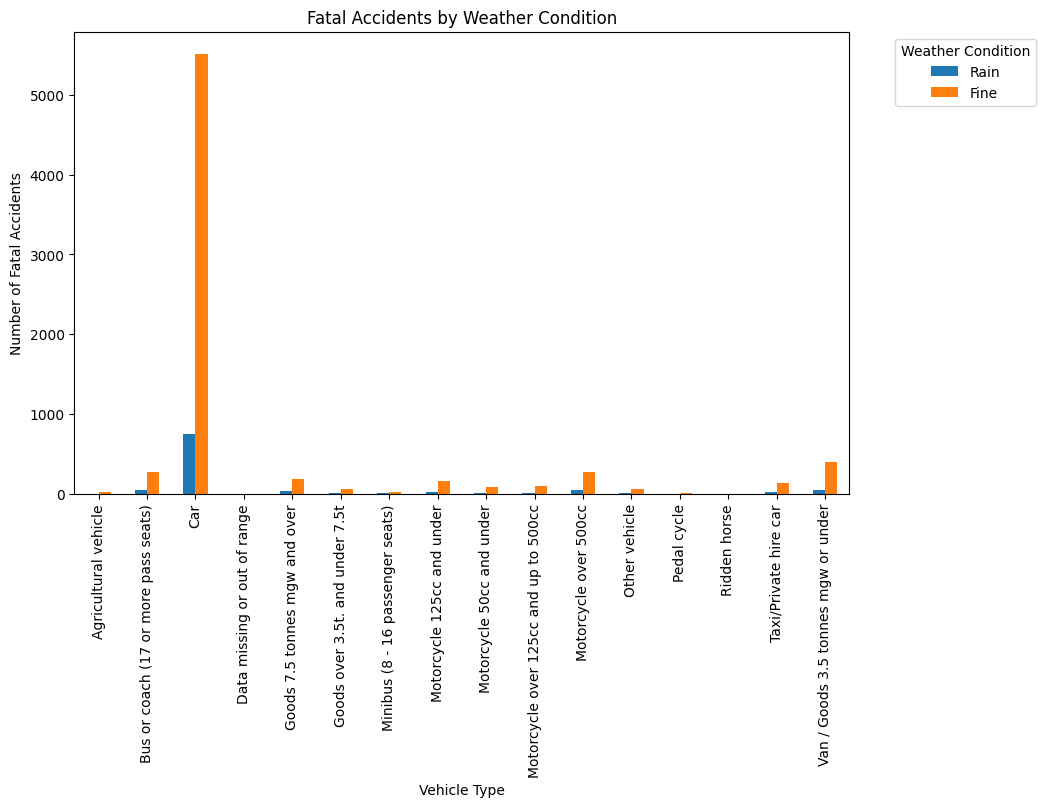

In [162]:
weather_rain = ['Raining no high winds', 'Raining + high winds']
weather_fine = ['Fine no high winds', 'Fine + high winds']

rain_fatal = accidents[(accidents['Weather_Conditions'].isin(weather_rain)) & (accidents['Accident_Severity'] == 'Fatal')].groupby('Vehicle_Type').size()
fine_fatal = accidents[(accidents['Weather_Conditions'].isin(weather_fine)) & (accidents['Accident_Severity'] == 'Fatal')].groupby('Vehicle_Type').size()

weather_fatal_df = pd.DataFrame({'Rain': rain_fatal, 'Fine': fine_fatal}).fillna(0)

weather_fatal_df.plot(kind='bar', figsize=(10, 6))
plt.ylabel('Number of Fatal Accidents')
plt.xlabel('Vehicle Type')
plt.title('Fatal Accidents by Weather Condition')
plt.legend(title='Weather Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<h1 style=background-color:lightgreen>[Insight #7] Most Fatal Accident in Car Type happened when the weather is fine </h1>

<h1 style=background-color:lightblue>[#8]Does the wet road surface condition has an impact with the fatal injury</h1>


In [163]:
accidents['Index'].count()

np.int64(660679)

In [164]:
accidents['Road_Surface_Conditions'].value_counts()

Road_Surface_Conditions
Dry                     448547
Wet or damp             186708
Frost or ice             18517
Snow                      5890
Flood over 3cm. deep      1017
Name: count, dtype: int64

In [165]:
wet = accidents[accidents['Road_Surface_Conditions'] == 'Wet or damp'].count()
wet['Road_Surface_Conditions']

np.int64(186708)

In [166]:
fatal = accidents[accidents['Accident_Severity'] == 'Fatal'].count()
fatal['Accident_Severity']

np.int64(8661)

In [167]:
r_a = accidents[accidents['Road_Surface_Conditions'] == 'Wet or damp'].count() / accidents[accidents['Accident_Severity'] == 'Fatal'].count()
total = r_a / 660679
total * 100

Index                      0.003263
Accident_Severity          0.003263
Accident Date              0.003205
Latitude                   0.003263
Light_Conditions           0.003263
District Area              0.003263
Longitude                  0.003263
Number_of_Casualties       0.003263
Number_of_Vehicles         0.003263
Road_Surface_Conditions    0.003263
Road_Type                  0.003263
Urban_or_Rural_Area        0.003263
Weather_Conditions         0.003263
Vehicle_Type               0.003263
Year                       0.003205
Month                      0.003205
Day                        0.003205
DayOfWeek                  0.003205
dtype: float64

<h1 style=background-color:lightgreen>[Insight #8] </h1>

<h1 style=background-color:lightblue>[#9]What is the average number of incident happened per month?</h1>


In [172]:
accidents['Month'].mean()

np.float64(6.70837374107099)

In [173]:
months= accidents.groupby('Month').size()
months

Month
1.0     18252
2.0     22264
3.0     21824
4.0     19787
5.0     21723
6.0     22196
7.0     22939
8.0     21106
9.0     22558
10.0    23962
11.0    24240
12.0    24156
dtype: int64

In [174]:
accidents_per_month = months.mean()
accidents_per_month

np.float64(22083.916666666668)

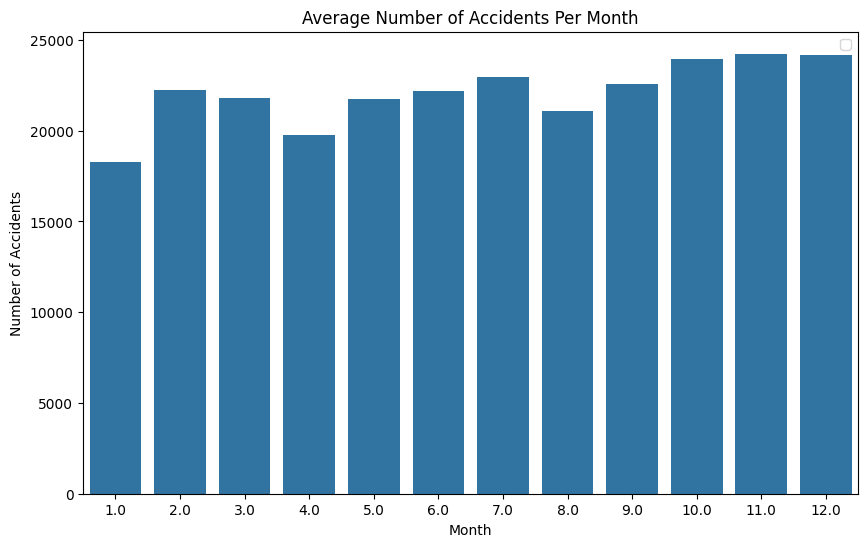

In [175]:
months = accidents.groupby('Month').size()

accidents_per_month = months.mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=months.index, y=months.values)
plt.ylabel('Number of Accidents')
plt.xlabel('Month')
plt.title('Average Number of Accidents Per Month')
plt.legend()

plt.show()

<h1 style=background-color:lightgreen>[Insight #9] 22083.9 Is the average accident per month</h1>

<h1 style=background-color:lightblue>[#10]What district has the most record of accident in a year?</h1>

In [176]:
accidents['District Area'].value_counts()

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

In [177]:
area_year = np.round(accidents[accidents['District Area'] == 'Birmingham'].groupby(['Year']).size())
area_year

Year
2019.0    1554
2020.0    1438
2021.0    1308
2022.0    1145
dtype: int64

<h1 style=background-color:lightgreen>[Insight #10] District area name Birmingham has the most record of accident happen in year 2019 with 1554 records</h1>

<h1 style=background-color:lightblue>[#11] Is it possible that the fatal injury might happened in that district?</h1>

In [178]:
accidents['District Area'].value_counts()

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

In [179]:
accidents['Accident_Severity'].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

In [180]:
birminghan_fatal = accidents[(accidents['Accident_Severity'] == 'Fatal') & (accidents['District Area'] == 'Birmingham')]
birminghan_fatal['Accident_Severity'].count()

np.int64(105)

In [181]:
b_f = birminghan_fatal['Accident_Severity'].count() / accidents[accidents['Accident_Severity'] == 'Fatal'].count()
b_f['Accident_Severity'] * 100

np.float64(1.2123311395912713)

<h1 style=background-color:lightgreen>[Insight #11] There are a little chance that an accident with fatal injury might happened in the district named birminghan </h1>

<h1 style=background-color:lightblue>[#12]Correlation of Number of vehicle and Number of casualties </h1>

In [182]:
accidents['Number_of_Vehicles'].corr(accidents['Number_of_Casualties'])

np.float64(0.22888886126927627)

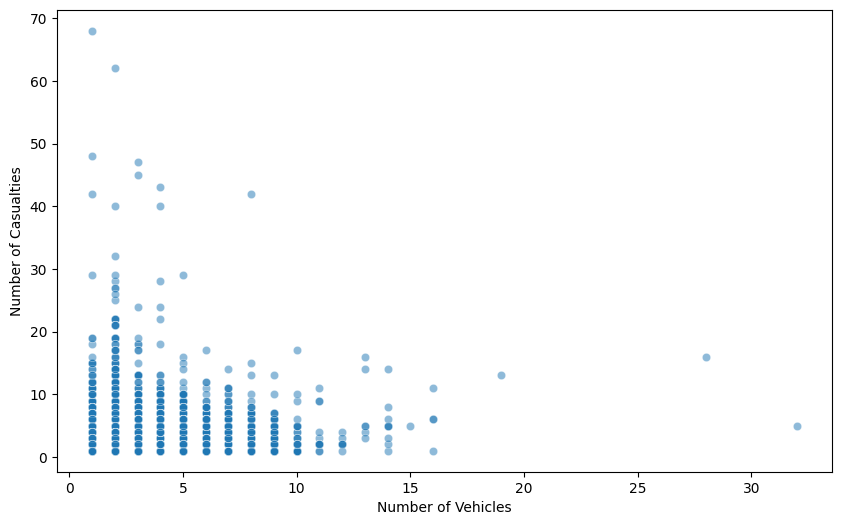

In [184]:
correlation = accidents['Number_of_Vehicles'].corr(accidents['Number_of_Casualties'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=accidents['Number_of_Vehicles'], y=accidents['Number_of_Casualties'], alpha=0.5)
plt.xlabel('Number of Vehicles')
plt.ylabel('Number of Casualties')
plt.show()


<h1 style=background-color:lightgreen>[Insight #12] </h1>

<h1 style=background-color:lightblue>[#13]What is the lowest accident_severity in the records?</h1>

In [ ]:
accidents['Accident_Severity'].value_counts()

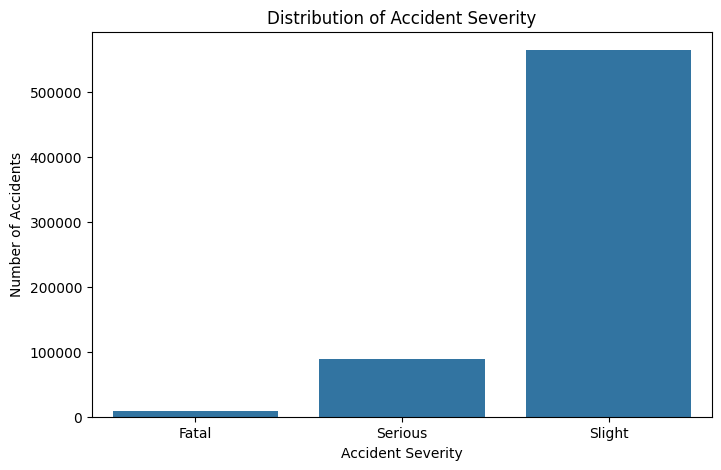

In [185]:
severity_counts = accidents['Accident_Severity'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=severity_counts.index, y=severity_counts.values)

plt.xlabel('Accident Severity')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Accident Severity')
plt.show()

<h1 style=background-color:lightgreen>[Insight #13] Fatal is the lowest accident severity recorded</h1>

<h1 style=background-color:lightblue>[#14]What is a type of vehicle that has the highest accident record?</h1>

In [187]:
accidents['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

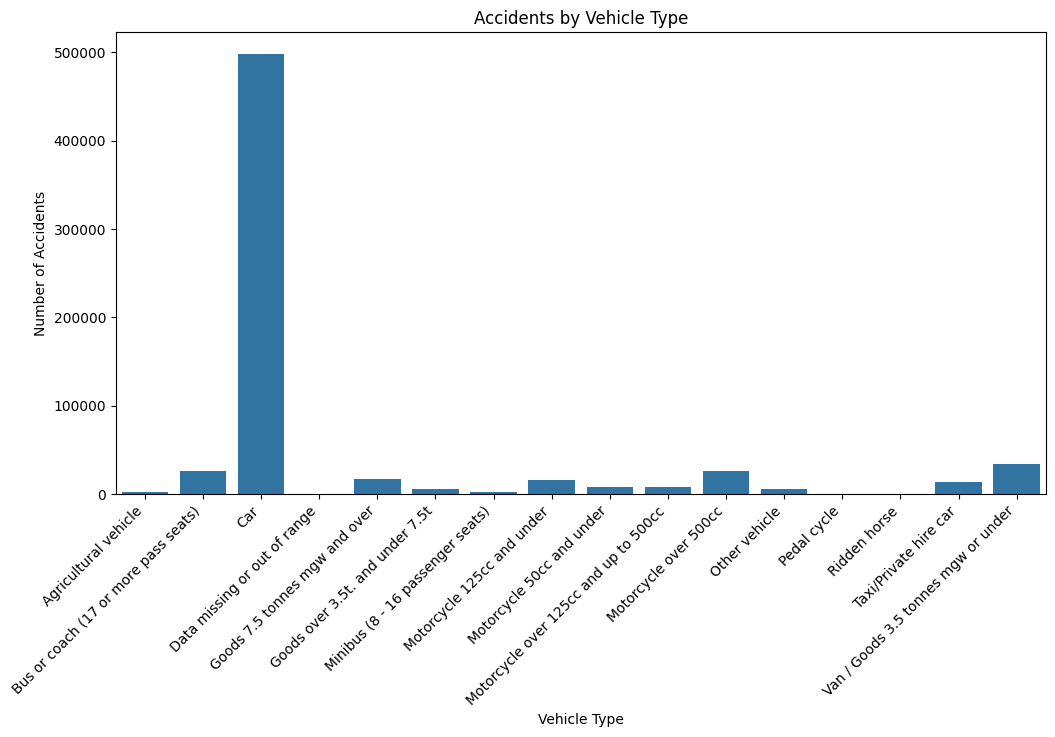

In [186]:
vehicle_counts = accidents['Vehicle_Type'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=vehicle_counts.index, y=vehicle_counts.values)
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Vehicle Type')
plt.xticks(rotation=45, ha='right')

plt.show()

<h1 style=background-color:lightgreen>[Insight #14] Car is the most vehicle type recorded</h1>

<h1 style=background-color:lightblue>[#15]What is a type of vehicle that has the highest accident in a single cariageway roadtype that is more involved in fatal accidents?</h1>

In [188]:
acdnt_year = np.round(accidents[accidents['Accident_Severity'] == 'Fatal'].groupby(['Vehicle_Type','Road_Type']).size())
acdnt_year.unstack()

Road_Type,Dual carriageway,One way street,Roundabout,Single carriageway,Slip road,unknown
Vehicle_Type,,,,,,
Agricultural vehicle,6,1,0,14,0,0
Bus or coach (17 or more pass seats),63,2,6,249,3,2
Car,1364,69,109,4973,33,29
Data missing or out of range,0,0,0,0,0,0
Goods 7.5 tonnes mgw and over,49,3,4,158,2,0
Goods over 3.5t. and under 7.5t,13,4,0,48,1,1
Minibus (8 - 16 passenger seats),5,0,0,24,0,0
Motorcycle 125cc and under,33,2,3,150,1,0
Motorcycle 50cc and under,23,4,0,68,0,0


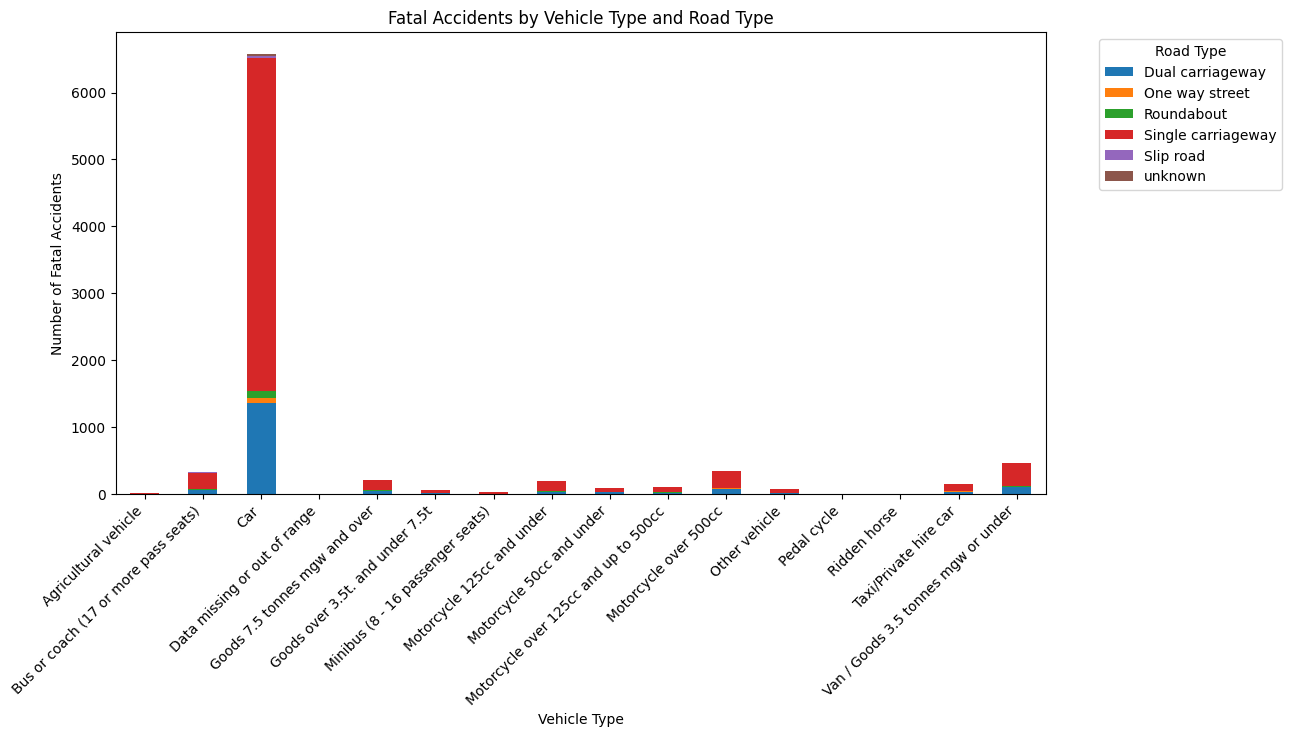

In [189]:
acdnt_vehicle_road = accidents[accidents['Accident_Severity'] == 'Fatal'].groupby(['Vehicle_Type', 'Road_Type']).size().unstack()

acdnt_vehicle_road.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.ylabel('Number of Fatal Accidents')
plt.xlabel('Vehicle Type')
plt.title('Fatal Accidents by Vehicle Type and Road Type')
plt.legend(title='Road Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

plt.show()

<h1 style=background-color:lightgreen>[Insight #15] Car is the most vehicle type involve in fatal accidents</h1>

<h1 style=background-color:lightblue>[#16]what is the percentage of agricultural vehicle that involve in an accident in an urban area?</h1>

In [191]:
accidents[accidents['Vehicle_Type'] == 'Agricultural vehicle']['Index'].count()

np.int64(1947)

In [192]:
accidents['Vehicle_Type']

0                                          Car
1                                          Car
2                        Taxi/Private hire car
3         Bus or coach (17 or more pass seats)
4                                Other vehicle
                          ...                 
660674                                     Car
660675                                     Car
660676                                     Car
660677                   Motorcycle over 500cc
660678                                     Car
Name: Vehicle_Type, Length: 660679, dtype: category
Categories (16, object): ['Agricultural vehicle', 'Bus or coach (17 or more pass seats)', 'Car', 'Data missing or out of range', ..., 'Pedal cycle', 'Ridden horse', 'Taxi/Private hire car', 'Van / Goods 3.5 tonnes mgw or under']

In [193]:
accidents[accidents['Vehicle_Type'] == 'Agricultural vehicle']

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
4800,200701GD66905,Slight,NaT,51.533985,Daylight,Hackney,-0.073607,1,2,Dry,Roundabout,Urban,Fine no high winds,Agricultural vehicle,NaN,NaN,NaN,NaN
4845,200701GD67355,Slight,2019-10-02,51.526415,Daylight,Hackney,-0.078107,1,2,Dry,Single carriageway,Urban,Fine no high winds,Agricultural vehicle,2019.0,10.0,2.0,2.0
5294,200701HT20309,Serious,NaT,51.517885,Daylight,Tower Hamlets,-0.040846,1,1,Dry,Single carriageway,Urban,Fine no high winds,Agricultural vehicle,NaN,NaN,NaN,NaN
7034,200701JI67850,Slight,2019-11-05,51.551610,Daylight,Redbridge,0.074125,3,2,Dry,Single carriageway,Urban,Fine no high winds,Agricultural vehicle,2019.0,11.0,5.0,1.0
7084,200701JI68444,Slight,NaT,51.583797,Daylight,Redbridge,0.084685,1,1,Dry,Single carriageway,Urban,Fine no high winds,Agricultural vehicle,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659255,201063AC32810,Serious,2022-09-10,51.860944,Darkness - lights lit,Carmarthenshire,-4.302054,1,1,Wet or damp,Single carriageway,Urban,Raining no high winds,Agricultural vehicle,2022.0,9.0,10.0,5.0
660328,201063DP37110,Slight,NaT,51.946663,Daylight,Powys,-3.396716,1,3,Wet or damp,Single carriageway,Rural,Raining no high winds,Agricultural vehicle,NaN,NaN,NaN,NaN
660362,201063DP40710,Slight,NaT,51.977517,Daylight,Powys,-3.690630,2,2,Frost or ice,Single carriageway,Rural,Fine no high winds,Agricultural vehicle,NaN,NaN,NaN,NaN
660379,201063DP42610,Slight,NaT,52.765977,Darkness - no lighting,Powys,-3.220771,1,2,Snow,Single carriageway,Rural,Other,Agricultural vehicle,NaN,NaN,NaN,NaN


In [194]:
agri = np.round(accidents[accidents['Vehicle_Type'] == 'Agricultural vehicle'].groupby(['Urban_or_Rural_Area']).size())
agri

Urban_or_Rural_Area
Rural           675
Unallocated       0
Urban          1272
dtype: int64

In [ ]:
agri_urban = 1272 / 1947
agri_urban * 100

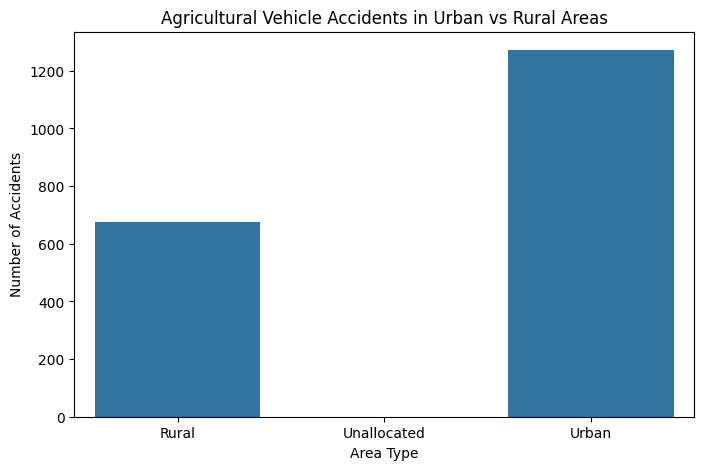

In [195]:
agri = accidents[accidents['Vehicle_Type'] == 'Agricultural vehicle'].groupby(['Urban_or_Rural_Area']).size()

plt.figure(figsize=(8, 5))
sns.barplot(x=agri.index, y=agri.values)
plt.xlabel('Area Type')
plt.ylabel('Number of Accidents')
plt.title('Agricultural Vehicle Accidents in Urban vs Rural Areas')

plt.show()

<h1 style=background-color:lightgreen>[Insight #16] most of an accident involving the agricultural vehicle happened in urban area</h1>

<h1 style=background-color:lightblue>[#17]What record of Fatal acccidenthas the highest record? Urban or Rural</h1>

In [ ]:
acdnt_year = np.round(accidents.groupby(['Accident_Severity','Urban_or_Rural_Area']).size())
acdnt_year.unstack()

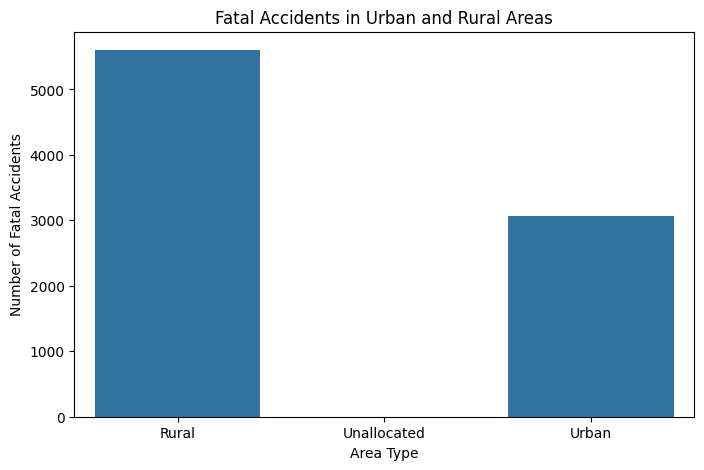

In [196]:
fatal_accidents = accidents[accidents['Accident_Severity'] == 'Fatal'].groupby('Urban_or_Rural_Area').size()

plt.figure(figsize=(8, 5))
sns.barplot(x=fatal_accidents.index, y=fatal_accidents.values)
plt.ylabel('Number of Fatal Accidents')
plt.xlabel('Area Type')
plt.title('Fatal Accidents in Urban and Rural Areas')

plt.show()

<h1 style=background-color:lightgreen>[Insight #17] This insight shows that Most fatal accident is recorded from rural area</h1>

<h1 style=background-color:lightblue>[#18]What month does the Motorcycle has a highest record accident urban area?</h1>

In [ ]:
motor_types = ['Motorcycle over 500cc', 'Motorcycle 125cc and under', 'Motorcycle over 125cc and up to 500cc', 'Motorcycle 50cc and under']

In [ ]:
motor = np.round(accidents[accidents['Vehicle_Type'].isin(motor_types)].groupby(['Urban_or_Rural_Area','Month']).size())
motor.unstack()

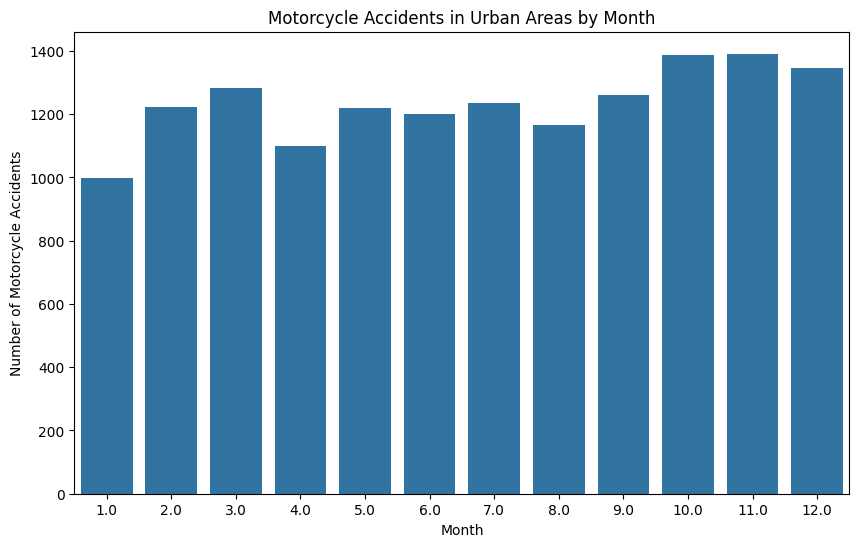

In [197]:
motor_urban = accidents[(accidents['Vehicle_Type'].isin(motor_types)) & (accidents['Urban_or_Rural_Area'] == 'Urban')]

motor_urban_month = motor_urban.groupby('Month').size()

plt.figure(figsize=(10, 6))
sns.barplot(x=motor_urban_monthly.index, y=motor_urban_month.values)
plt.xlabel('Month')
plt.ylabel('Number of Motorcycle Accidents')
plt.title('Motorcycle Accidents in Urban Areas by Month')
plt.show()

<h1 style=background-color:lightgreen>[Insight #18] Month of november is a month where a motorcycle has a highest record</h1>

<h1 style=background-color:lightblue>[#19]What district has the largest number of recorded accident?</h1>

In [198]:
accidents['District Area'].value_counts() 

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

<h1 style=background-color:lightgreen>[Insight #19] Birmingham has the highest number of accidents recorded</h1>